<a href="https://colab.research.google.com/github/sierraechobravoindia/RL_Schulung/blob/main/Simple_Q_Learning_on_Discrete_Mountain_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_02_qlearningreinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Learning on Mountain Car 


In [1]:
!sudo apt-get install -y xvfb ffmpeg x11-utils
#!pip install -q 'gym==0.10.11'
!pip install -q gym
#!pip install -q 'imageio==2.4.0'
!pip install -q imageio
!pip install -q PILLOW
#!pip install -q 'pyglet==1.3.2'
!pip install -q pyglet
!pip install -q pyvirtualdisplay
!pip install -q tf-agents

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


[0.6  0.07]
[-1.2  -0.07]
Observation Spec:
BoundedArraySpec(shape=(2,), dtype=dtype('float32'), name='observation', minimum=[-1.2  -0.07], maximum=[0.6  0.07])
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=2)
Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')
Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([-0.5782699,  0.       ], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})


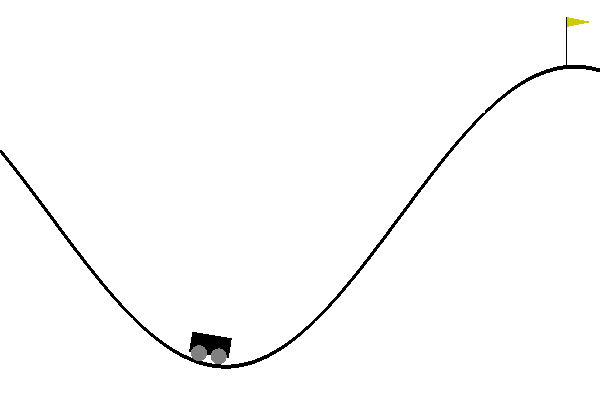

In [2]:
import tf_agents
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

env_name = 'MountainCar-v0'
env = suite_gym.load(env_name)
time_step = env.reset()

print(env.observation_space.high)
print(env.observation_space.low)

print('Observation Spec:')
print(env.time_step_spec().observation)

print('Action Spec:')
print(env.action_spec())

print('Reward Spec:')
print(env.time_step_spec().reward)

print('Time step:')
print(time_step)
PIL.Image.fromarray(env.render())


    Description:
        The agent (a car) is started at the bottom of a valley. For any given
        state the agent may choose to accelerate to the left, right or cease
        any acceleration.

    Source:
        The environment appeared first in Andrew Moore's PhD Thesis (1990).

    Observation:


        Type: Box(2)
        Num    Observation               Min            Max
        0      Car Position              -1.2           0.6
        1      Car Velocity              -0.07          0.07
    
    Actions:
        Type: Discrete(3)
        Num    Action
        0      Accelerate to the Left
        1      Don't accelerate
        2      Accelerate to the Right
        Note: This does not affect the amount of velocity affected by the
        gravitational pull acting on the car.
    
    Reward:
         Reward of 0 is awarded if the agent reached the flag (position = 0.5)
         on top of the mountain.
         Reward of -1 is awarded if the position of the agent is less than 0.5.
    
    Starting State:
         The position of the car is assigned a uniform random value in
         [-0.6 , -0.4].
         The starting velocity of the car is always assigned to 0.
    
    Episode Termination:
         The car position is more than 0.5
         Episode length is greater than 200


In [3]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


The following code shows an agent that applies full throttle to climb the hill.  The cart is not strong enough.  It will need to use potential energy from the mountain behind it.

In [4]:
env = wrap_env(gym.make("MountainCar-v0"))
env.reset()
done = False

i = 0
while not done:
    i += 1
    state, reward, done, _ = env.step(2)
    env.render()
    print(f"Step {i}: State={state}, Reward={reward}")
    
env.close()

Step 1: State=[-0.53330634  0.0010809 ], Reward=-1.0
Step 2: State=[-0.53115265  0.0021537 ], Reward=-1.0
Step 3: State=[-0.5279423   0.00321035], Reward=-1.0
Step 4: State=[-0.52369938  0.00424292], Reward=-1.0
Step 5: State=[-0.51845571  0.00524368], Reward=-1.0
Step 6: State=[-0.5122506  0.0062051], Reward=-1.0
Step 7: State=[-0.50513059  0.00712001], Reward=-1.0
Step 8: State=[-0.49714903  0.00798157], Reward=-1.0
Step 9: State=[-0.48836562  0.0087834 ], Reward=-1.0
Step 10: State=[-0.47884598  0.00951965], Reward=-1.0
Step 11: State=[-0.46866097  0.01018501], Reward=-1.0
Step 12: State=[-0.45788613  0.01077484], Reward=-1.0
Step 13: State=[-0.44660095  0.01128518], Reward=-1.0
Step 14: State=[-0.43488814  0.01171282], Reward=-1.0
Step 15: State=[-0.42283282  0.01205531], Reward=-1.0
Step 16: State=[-0.4105218   0.01231103], Reward=-1.0
Step 17: State=[-0.39804268  0.01247912], Reward=-1.0
Step 18: State=[-0.38548312  0.01255956], Reward=-1.0
Step 19: State=[-0.37293004  0.01255308

In [5]:
show_video()

### Programmed Car

Now we will look at a car with a rule based policy: Whatever direction the vehicle is currently rolling, the agent uses power in that direction.  Therefore, the car begins to climb a hill, is overpowered, and turns backward.  However, once it starts to roll backward force is immediately applied in this new direction.

The following code implements this preprogrammed car.

In [6]:
import gym

env = wrap_env(gym.make("MountainCar-v0"))
 
state = env.reset()
done = False

i = 0
while not done:
    i += 1
    
    if state[1]>0:
        action = 2
    else:
        action = 0
    
    state, reward, done, _ = env.step(action)
    env.render()
    print(f"Step {i}: State={state}, Reward={reward}")



env.close()

Step 1: State=[-0.52389396 -0.00100533], Reward=-1.0
Step 2: State=[-0.52589707 -0.00200311], Reward=-1.0
Step 3: State=[-0.52888295 -0.00298588], Reward=-1.0
Step 4: State=[-0.53282919 -0.00394625], Reward=-1.0
Step 5: State=[-0.53770622 -0.00487703], Reward=-1.0
Step 6: State=[-0.54347747 -0.00577125], Reward=-1.0
Step 7: State=[-0.55009972 -0.00662225], Reward=-1.0
Step 8: State=[-0.55752342 -0.0074237 ], Reward=-1.0
Step 9: State=[-0.56569313 -0.00816971], Reward=-1.0
Step 10: State=[-0.57454797 -0.00885484], Reward=-1.0
Step 11: State=[-0.58402217 -0.0094742 ], Reward=-1.0
Step 12: State=[-0.59404568 -0.01002351], Reward=-1.0
Step 13: State=[-0.60454476 -0.01049908], Reward=-1.0
Step 14: State=[-0.61544269 -0.01089793], Reward=-1.0
Step 15: State=[-0.62666048 -0.01121779], Reward=-1.0
Step 16: State=[-0.63811756 -0.01145708], Reward=-1.0
Step 17: State=[-0.64973255 -0.01161499], Reward=-1.0
Step 18: State=[-0.66142394 -0.0116914 ], Reward=-1.0
Step 19: State=[-0.67311086 -0.011686

We now visualize the preprogrammed car solving the problem.

In [7]:
show_video()

### Q-Learning Car


$Q^{new}(s_{t},a_{t}) \leftarrow \underbrace{Q(s_{t},a_{t})}_{\text{old value}} + \underbrace{\alpha}_{\text{learning rate}} \cdot  \overbrace{\bigg( \underbrace{\underbrace{r_{t}}_{\text{reward}} + \underbrace{\gamma}_{\text{discount factor}} \cdot \underbrace{\max_{a}Q(s_{t+1}, a)}_{\text{estimate of optimal future value}}}_{\text{new value (TD-target)}} - \underbrace{Q(s_{t},a_{t})}_{\text{old value}} \bigg) }^{\text{TD-error}}$






In [8]:
import gym
import numpy as np

# Binning in discrete state space
def calc_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/buckets
    return tuple(discrete_state.astype(np.int))  

# Run one game.  The q_table to use is provided.  We also 
# provide a flag to indicate if the game should be 
# rendered/animated.  Finally, we also provide
# a flag to indicate if the q_table should be updated.

def run_game(q_table, render, should_update):
    done = False
    discrete_state = calc_discrete_state(env.reset())
    success = False
    
    while not done:
        # Exploit or explore
        if np.random.random() > epsilon:
            # Exploit - use q-table to take current best action 
            # (and probably refine)
            action = np.argmax(q_table[discrete_state])
        else:
            # Explore - t
            action = np.random.randint(0, env.action_space.n)
            
        # Run simulation step
        new_state, reward, done, _ = env.step(action)
        
        # Convert continuous state to discrete
        new_state_disc = calc_discrete_state(new_state)

        # Have we reached the goal position (have we won?)?
        if new_state[0] >= env.unwrapped.goal_position:
            success = True
          
        # Update q-table
        if should_update:
            max_future_q = np.max(q_table[new_state_disc])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * \
              (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_state_disc
        
        if render:
            env.render()
            
    return success


Several hyperparameters are very important for Q-Learning. These parameters will likely need adjustment as you apply Q-Learning to other problems.  Because of this, it is crucial to understand the role of each parameter.

* **LEARNING_RATE** The rate at which previous Q-values are updated based on new episodes run during training. 
* **DISCOUNT** The amount of significance to give estimates of future rewards when added to the reward for the current action taken.  A value of 0.95 would indicate a discount of 5% to the future reward estimates. 
* **EPISODES** The number of episodes to train over.  Increase this for more complex problems; however, training time also increases.
* **SHOW_EVERY** How many episodes to allow to elapse before showing an update.
* **DISCRETE_GRID_SIZE** How many buckets to use when converting each of the continuous state variables.  For example, [10, 10] indicates that the algorithm should use ten buckets for the first and second state variables.
* **START_EPSILON_DECAYING** Epsilon is the probability that the agent will select a random action over what the Q-Table suggests. This value determines the starting probability of randomness.
* **END_EPSILON_DECAYING** How many episodes should elapse before epsilon goes to zero and no random actions are permitted. For example, EPISODES//10  means only the first 1/10th of the episodes might have random actions.

In [9]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 50
SHOW_EVERY = 1000

DISCRETE_GRID_SIZE = [10, 10]
START_EPSILON_DECAYING = 0.5
END_EPSILON_DECAYING = EPISODES//10

In [10]:
env = wrap_env(gym.make("MountainCar-v0"))

epsilon = 1  
epsilon_change = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)
buckets = (env.observation_space.high - env.observation_space.low) \
    /DISCRETE_GRID_SIZE
q_table = np.random.uniform(low=-3, high=0, size=(DISCRETE_GRID_SIZE \
    + [env.action_space.n]))
success = False

In [11]:
episode = 0
success_count = 0

# Loop through the required number of episodes
while episode<EPISODES:
    episode+=1
    done = False

    # Run the game.  If we are local, display render animation at SHOW_EVERY
    # intervals. 
    if episode % SHOW_EVERY == 0:
        print(f"Current episode: {episode}, success: {success_count}" +\
              " ({float(success_count)/SHOW_EVERY})")
        success = run_game(q_table, True, False)
        success_count = 0
    else:
        success = run_game(q_table, False, True)
        
    # Count successes
    if success:
        success_count += 1

    # Move epsilon towards its ending value, if it still needs to move
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon = max(0, epsilon - epsilon_change)

print(success)

False


As you can see, the number of successful episodes generally increases as training progresses.  It is not advisable to stop the first time that we observe 100% success over 1,000 episodes. There is a randomness to most games, so it is not likely that an agent would retain its 100% success rate with a new run.  Once you observe that the agent has gotten 100% for several update intervals, it might be safe to stop training.

# Running and Observing the Agent

Now that the algorithm has trained the agent, we can observe the agent in action. You can use the following code to see the agent in action.

In [12]:
run_game(q_table, True, False)
show_video()

# Inspecting the Q-Table

We can also display the Q-table.  The following code shows the action that the agent would perform for each environment state.  As the weights of a neural network, this table is not straightforward to interpret.  Some patterns do emerge in that directions do arise, as seen by calculating the means of rows and columns. The actions seem consistent at upper and lower halves of both velocity and position.

In [13]:
import pandas as pd

df = pd.DataFrame(q_table.argmax(axis=2))

df.columns = [f'v-{x}' for x in range(DISCRETE_GRID_SIZE[0])]
df.index = [f'p-{x}' for x in range(DISCRETE_GRID_SIZE[1])]
df

,v-0,v-1,v-2,v-3,v-4,v-5,v-6,v-7,v-8,v-9
p-0,1,2,2,0,2,1,0,0,2,0
p-1,1,2,0,0,2,1,1,2,1,1
p-2,0,0,1,0,1,1,2,2,1,0
p-3,2,0,0,0,2,2,1,2,1,2
p-4,1,1,0,0,1,2,2,0,2,2
p-5,2,1,2,1,2,2,0,1,1,1
p-6,0,1,0,2,1,1,2,1,1,0
p-7,1,0,0,1,0,0,1,1,0,2
p-8,0,2,2,2,1,1,0,0,1,2
p-9,2,1,0,0,0,1,1,1,0,1


In [14]:
df.mean(axis=0)

v-0    1.0
v-1    1.0
v-2    0.7
v-3    0.6
v-4    1.2
v-5    1.2
v-6    1.0
v-7    1.0
v-8    1.0
v-9    1.1
dtype: float64

In [15]:
df.mean(axis=1)

p-0    1.0
p-1    1.1
p-2    0.8
p-3    1.2
p-4    1.1
p-5    1.3
p-6    0.9
p-7    0.6
p-8    1.1
p-9    0.7
dtype: float64